### Loading packages and dataset

In [1]:
import sys
import os
import datetime
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.preprocessing import *
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load dataset
# Removing of feature 'Unnamed 0', removing duplicates based on url feature, transform date 
# feature in timestamp
df1 = preprocess1('../data/raw_analyst_ratings.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 883429 entries, 2020-06-05 14:30:54+00:00 to 2011-05-12 04:00:00+00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   headline   883429 non-null  object
 1   url        883429 non-null  object
 2   publisher  883429 non-null  object
 3   stock      883429 non-null  object
dtypes: object(4)
memory usage: 33.7+ MB


,headline,url,publisher,stock
date,,,,
2020-06-05 14:30:54+00:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
2020-06-03 14:45:20+00:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2020-05-26 08:30:07+00:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
2020-05-22 16:45:06+00:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
2020-05-22 15:38:59+00:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


### Descriptive statistics

In [3]:
# Creation of a new feature (headline_length) 
df1['headline_length'] = df1['headline'].apply(lambda i: len(i))

In [4]:
df1.sample(5)

,headline,url,publisher,stock,headline_length
date,,,,,
2020-05-20 14:35:37+00:00,Shares of several energy companies are trading...,https://www.benzinga.com/wiim/20/05/16076134/s...,Benzinga Newsdesk,AM,115
2019-11-22 04:00:00+00:00,Hearing Generali May Make a Bid for MetLife's ...,https://www.benzinga.com/news/19/11/14868306/h...,Benzinga Newsdesk,MET,69
2011-11-03 04:00:00+00:00,InnerWorkings Raises 2011 EPS $0.30-$0.33 vs $...,https://www.benzinga.com/news/11/11/2094442/in...,Abe Raymond,INWK,92
2015-01-08 04:00:00+00:00,"'New Era:' Stifel Downgrades Google, Priceline...",https://www.benzinga.com/analyst-ratings/analy...,John Seward,PCLN,62
2012-11-26 04:00:00+00:00,"PVH, Warnaco Deal Approved",https://www.benzinga.com/news/12/11/3118206/pv...,Paul Quintaro,PVH,26


In [5]:
df1['headline_length'].describe()

count    883429.000000
mean         76.122674
std          35.332037
min           3.000000
25%          52.000000
50%          71.000000
75%          90.000000
max         512.000000
Name: headline_length, dtype: float64

In [6]:
df1['headline'][df1['headline_length']==3].values

array(['SPY', 'SRS', 'J.P', 'AMJ', 'J.P', 'PCP', 'QID', 'SUN', 'SUN',
       'TJX', 'WNR'], dtype=object)

We notice the presence of headlines with 3 characters. These characters are 'SPY', 'SRS', 'J.P', 'AMJ', 'J.P', 'PCP', 'QID', 'SUN', 'SUN', 'TJX', 'WNR'

In [7]:
# Number or articles per publisher
pub_art = df1['publisher'].groupby(df1['publisher']).count()
pub_art

publisher
47ertrends                        2
AARP                              2
ABNNewswire                      10
Aakin                             4
Aaron Jackson.Ed                  6
                              ...  
vic@forextraininggroup.com        1
vishwanath@benzinga.com        1830
vivek.proactive@gmail.com       120
wallstreet1928                    8
webmaster                     14214
Name: publisher, Length: 1034, dtype: int64

In [8]:
# 10 best publisher based on the number of publication
list(pub_art.sort_values(ascending=False)[:10].index)

['Paul Quintaro',
 'Benzinga Newsdesk',
 'Charles Gross',
 'Eddie Staley',
 'Hal Lindon',
 'Juan Lopez',
 'Monica Gerson',
 'Lisa Levin',
 'Vick Meyer',
 'Benzinga Staff']

Text(0.5, 1.0, '10 best publishers')

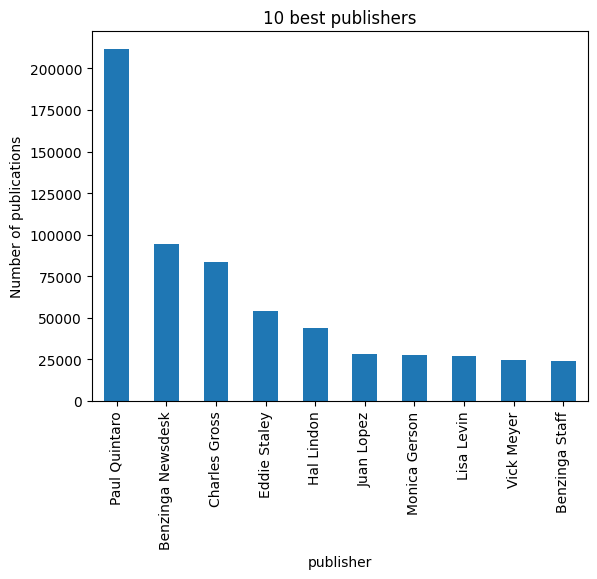

In [9]:
pub_art.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Number of publications')
plt.title('10 best publishers')

In [10]:
# Last publisher based on the number of publication
# Since, there are several to have published one time, we are going list all publishers who have 
# this statistic. There are 249.
pub_art[pub_art==1]

publisher
Accointing                    1
Adam Sarhan                   1
Adam Weiner                   1
Alex Roslin                   1
Alexander Voigt               1
                             ..
parvgoel                      1
phil                          1
summers s                     1
swenstock                     1
vic@forextraininggroup.com    1
Name: publisher, Length: 249, dtype: int64

#### Trends on the publications

##### Day trend analysis

We have data that are going from 2009-02-14 till 2020-06-11.

In [11]:
trend_per_day = df1.index.day_name().value_counts()
trend_per_day

date
Thursday     194910
Wednesday    192896
Tuesday      190640
Monday       166969
Friday       129103
Sunday         5888
Saturday       3023
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of publications based per day')

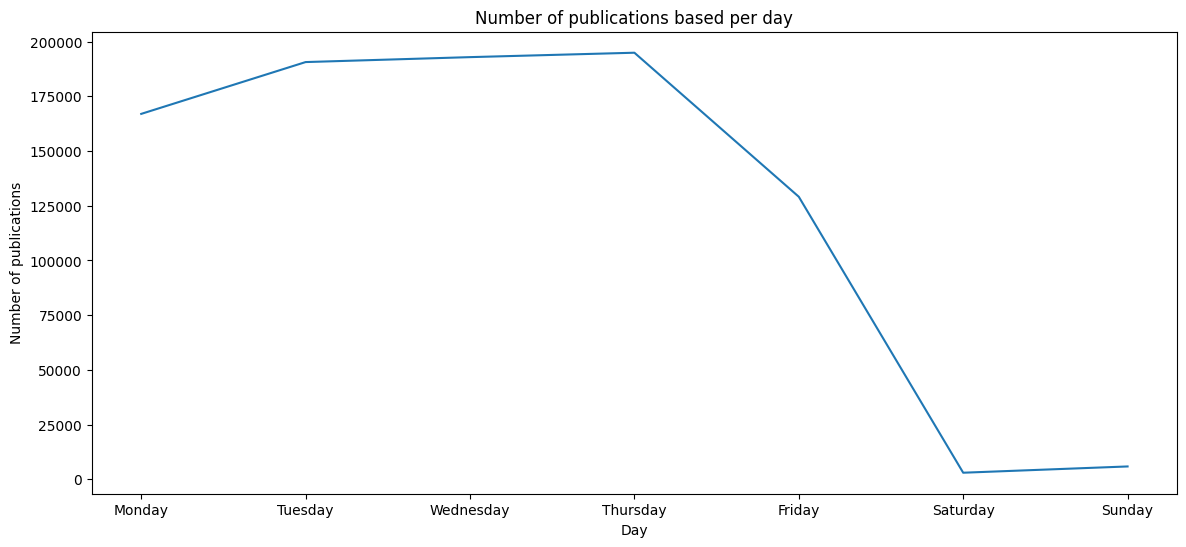

In [12]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trend_per_day = trend_per_day.reindex(days_order)
plt.figure(figsize=(14,6))
trend_per_day.plot()
plt.xlabel('Day')
plt.ylabel('Number of publications')
plt.title('Number of publications based per day')

We notice there are a lot of publications from Tuesday to Thursday. Week end saved less of publications

##### Month trend analysis

We have data that are going from 2009-02-14 till 2020-06-11. Since we don't have full year for 2009 and 2020, we are going reduce our data from 2009-06-11 till 2020-06-11 in order to appreciate the trends of publications per month

In [13]:
df1_1 = df1.sort_index()
df1_1 = df1_1.loc['2009-06-11':'2020-06-11']

In [14]:
trend_per_month = df1_1.index.month_name().value_counts()
trend_per_month.sort_values(ascending=False)

date
May          84153
October      80044
February     79779
April        79133
November     77014
January      76844
August       74595
March        73623
July         71758
June         64539
December     63960
September    57971
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of publications based per month')

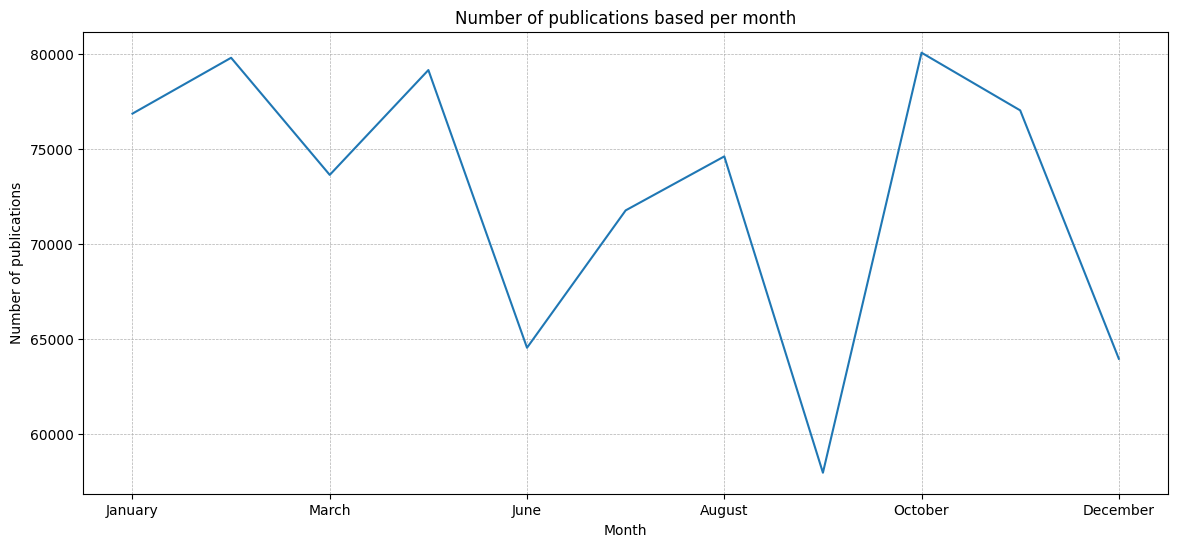

In [24]:
month_order = ['January', 'February', 'March', 'April', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

trend_per_month = trend_per_month.reindex(month_order)
plt.figure(figsize=(14,6))
trend_per_month.plot()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Month')
plt.ylabel('Number of publications')
plt.title('Number of publications based per month')

We notice that September month saved less of publication than other months while May month saved the higher number of publications.

##### Year trend analysis

Let's take data from 2010-01-01 to 2019-01-01 for trend analysis according to the year

In [19]:
df1_2 = df1.sort_index()
df1_2 = df1_2.loc['2010-01-01':'2019-01-01']

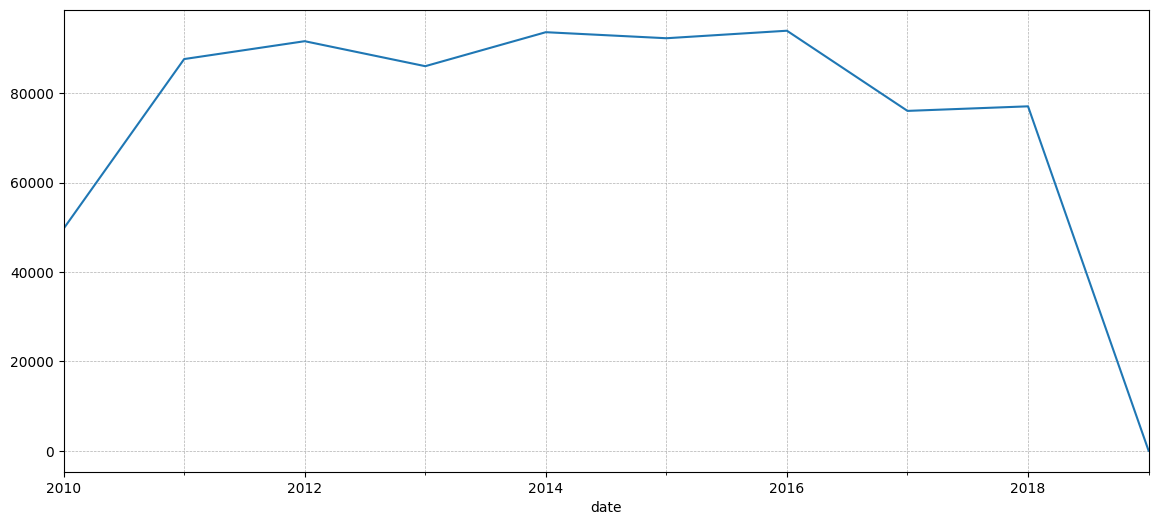

In [25]:
trend_per_year = df1_2.resample('A').size()
plt.figure(figsize=(14,6))
trend_per_year.plot()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

This picture reveal that years going from 2014 until 2016 have been more active. What is surprising is 2019 year where we saved just 5 publications. 

In [28]:
# saving of the dataframe for sentiment analysis
df1.to_csv('../data/df1.csv')